In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv("marketing_AB.csv")
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
df.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

In [5]:
control = df[df['test group'] == 'psa']
test = df[df['test group'] == 'ad']
control.shape, test.shape

((23524, 7), (564577, 7))

In [6]:
df['converted_num'] = df['converted'].astype(int)

In [7]:
control = df[df['test group'] == 'psa']
test = df[df['test group'] == 'ad']

In [8]:
control_rate = control['converted_num'].mean()
test_rate = test['converted_num'].mean()
control_rate, test_rate

(np.float64(0.01785410644448223), np.float64(0.025546559636683747))

In [10]:
alpha = 0.05
t_stat, p_value = stats.ttest_ind(
    control['converted_num'],
    test['converted_num']
)
p_value

np.float64(1.703305262783145e-13)

In [11]:
if p_value < alpha:
    print("Reject H0 -> Statistically significant difference")
else:
    print("Fail to reject H0 -> No Statistically significant difference")


Reject H0 -> Statistically significant difference


In [12]:
diff = test_rate - control_rate 

se = np.sqrt(
    control['converted_num'].var()/len(control) +
    test['converted_num'].var()/len(test)
)

ci_low = diff - 1.96 * se
ci_high = diff + 1.96 * se

diff, ci_high, ci_low


(np.float64(0.007692453192201517),
 np.float64(0.009434040990708189),
 np.float64(0.0059508653936948454))

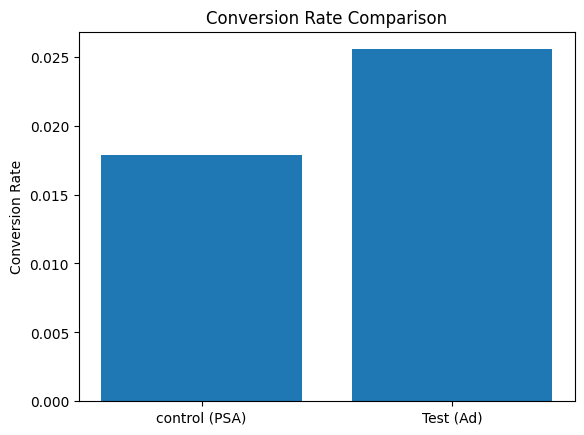

In [14]:
labels = ['control (PSA)', 'Test (Ad)']
rates = [control_rate, test_rate]

plt.bar(labels, rates)
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate Comparison')
plt.show()

In [15]:
summary = pd.DataFrame({
    'Group':['Control', 'Test'],
    'Conversion_Rate': [control_rate, test_rate]
})
summary['p_value'] = p_value
summary['CI_Low'] = ci_low
summary['CI_High'] = ci_high

summary.to_csv("ab_test_summary.csv", index=False)
summary

,Group,Conversion_Rate,p_value,CI_Low,CI_High
0,Control,0.017854,1.703305e-13,0.005951,0.009434
1,Test,0.025547,1.703305e-13,0.005951,0.009434


In [16]:
with open("final_recommendation.txt", "w") as f:
    f.write(
        "A/B Testing Final Recommendation\n\n"
        "The Test (Ad) group has a higher conversion rate than the Control (PSA) group.\n"
        "Statistical testing shows the difference is significant (p-value < 0.05).\n"
        "The 95% confidence interval does not include zero, confirming reliability.\n\n"
        "Recommendation:\n"
        "Roll out the Test version, while monitoring business cost and ROI."
    )
